### Comparing Feature Selection Methods

In this module, you have seen two ways to select features.  The first approach is using sequential feature selection to sequentially add or delete features and only use those that improve the model.  The second approach is using a regularized model to identify features based on non-zero coefficients.  This activity focuses on comparing variations of both these methods.  

You will use both the `SequentialFeatureSelection` and `RFE` (recursive feature elimination) to build and compare regression models.  Consider the following 6 feature selection methods -- leave all other arguments to default besides the `estimator` and `n_features_to_select` arguments:

- `Ridge` regressor to extract coefficients
- `SequentialFeatureSelection` using the `Lasso` to select 4 features.
- `RFE` using `Lasso` to select 4 features.

For each of these, fit the training data `X_train`, `y_train` below.  Compare the magnitude of the results of your `Ridge` model to those that result from feature selection methods.  

#### The Data

For this problem a dataset with information on red wine chemical compositions and their quality is given.  Your goal is to use the properties of the wine to predict the quality.  Below, the data is loaded and train/test splits constructed.

## Library Imports for Data Analysis and Modeling

In this section, we import all the necessary libraries for our analysis:

### Data Visualization and Manipulation
- **seaborn** and **matplotlib.pyplot**: For creating statistical visualizations
- **plotly.express**: For interactive visualizations
- **numpy**: For numerical operations
- **pandas**: For data manipulation and analysis

### Machine Learning Libraries (scikit-learn)
- **inspection**: For model inspection tools like permutation_importance
- **pipeline**: For creating processing pipelines
- **compose**: For combining different transformers
- **preprocessing**: For data preprocessing (StandardScaler)
- **model_selection**: For train_test_split to create training and test datasets
- **metrics**: For evaluation metrics (mean_squared_error, r2_score)


In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import pandas as pd

#from sklearn.feature_selection import SequentialFeatureSelector, SelectFromModel
from sklearn.inspection import permutation_importance
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, StandardScaler
#from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

## Data Loading

Here we load the red wine quality dataset from a CSV file. This dataset contains various chemical properties of red wines and a quality score that we'll try to predict.


In [31]:
#df = pd.read_csv('data/winequality-red.csv', sep = ';')
df = pd.read_csv('winequality-red.csv')#sep = ';')

## Data Exploration

Let's examine the first few rows of the dataset to understand its structure and content.


In [32]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Feature and Target Variable Separation

Here we separate our dataset into:
- Features (X): All columns except 'quality'
- Target variable (y): The 'quality' column, which represents the wine quality score


In [33]:
X = df.drop('quality', axis = 1)
y = df['quality']

## Target Variable Distribution

Let's visualize the distribution of our target variable (wine quality) to understand its characteristics. This helps us understand what we're trying to predict and whether the distribution is balanced.


<Axes: >

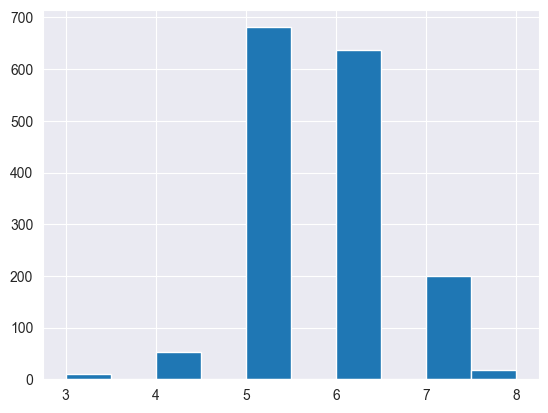

In [34]:
y.hist()

## Train-Test Split

Here we split our data into training and testing sets:
- Training set (75%): Used to train our models
- Testing set (25%): Used to evaluate model performance on unseen data

We use a fixed random_state (42) to ensure reproducibility of our results.


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

## Additional Library Imports for Feature Selection

Now we import specific libraries for our feature selection methods:
- **Ridge and Lasso**: Regularized regression models that can help with feature selection
- **LinearRegression**: Standard linear regression model for baseline comparison
- **SequentialFeatureSelector**: For forward or backward feature selection
- **RFE (Recursive Feature Elimination)**: For recursively removing features


In [36]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector, RFE

You will use both the `SequentialFeatureSelection` and `RFE` (recursive feature elimination) to build and compare regression models.  Consider the following 6 feature selection methods -- leave all other arguments to default besides the `estimator` and `n_features_to_select` arguments:

- `Ridge` regressor to extract coefficients
- `SequentialFeatureSelection` using the `Lasso` to select 4 features.
- `RFE` using `Lasso` to select 4 features.

For each of these, fit the training data `X_train`, `y_train` below.  Compare the magnitude of the results of your `Ridge` model to those that result from feature selection methods.  

#### The Data

For this problem a dataset with information on red wine chemical compositions and their quality is given.  Your goal is to use the properties of the wine to predict the quality.  Below, the data is loaded and train/test splits constructed.

### Ridge regressor to extract coefficients

## Ridge Regression Implementation

In this section, we implement Ridge regression with different regularization strengths (alpha values). Ridge regression is a regularized version of linear regression that adds a penalty term to the loss function, which helps prevent overfitting and can implicitly perform feature selection by shrinking coefficients.

For each alpha value, we:
1. Create a pipeline with StandardScaler and Ridge regression
2. Fit the model to the training data
3. Extract and store the model coefficients
4. Calculate and store the training and test MSE (Mean Squared Error)

This allows us to compare how different regularization strengths affect model performance and feature importance.


In [37]:
alphas = [0.01, 0.1, 1, 10, 100]
coefi = pd.DataFrame(X_train.columns.values, columns = ['Feature'])
mse_train = []
mse_test = []
for alpha in alphas:
    ri = Pipeline([
        ('stdr', StandardScaler()),
        ('ri',Ridge(alpha = alpha))
    ])

    ri.fit(X_train, y_train)
    coefi['alpha_'+ str(alpha)] = np.round(ri.named_steps['ri'].coef_, 3)
    mse_train.append(mean_squared_error(ri.predict(X_train), y_train))
    mse_test.append(mean_squared_error(ri.predict(X_test), y_test))





## Coefficient Visualization for Ridge Regression

Now we'll visualize how the coefficients of each feature change with different regularization strengths (alpha values). This helps us understand:
1. Which features have the largest impact on wine quality predictions
2. How regularization affects the importance of different features
3. Which features are most stable across different alpha values

First, we reshape our coefficient data for easier visualization using the melt function.


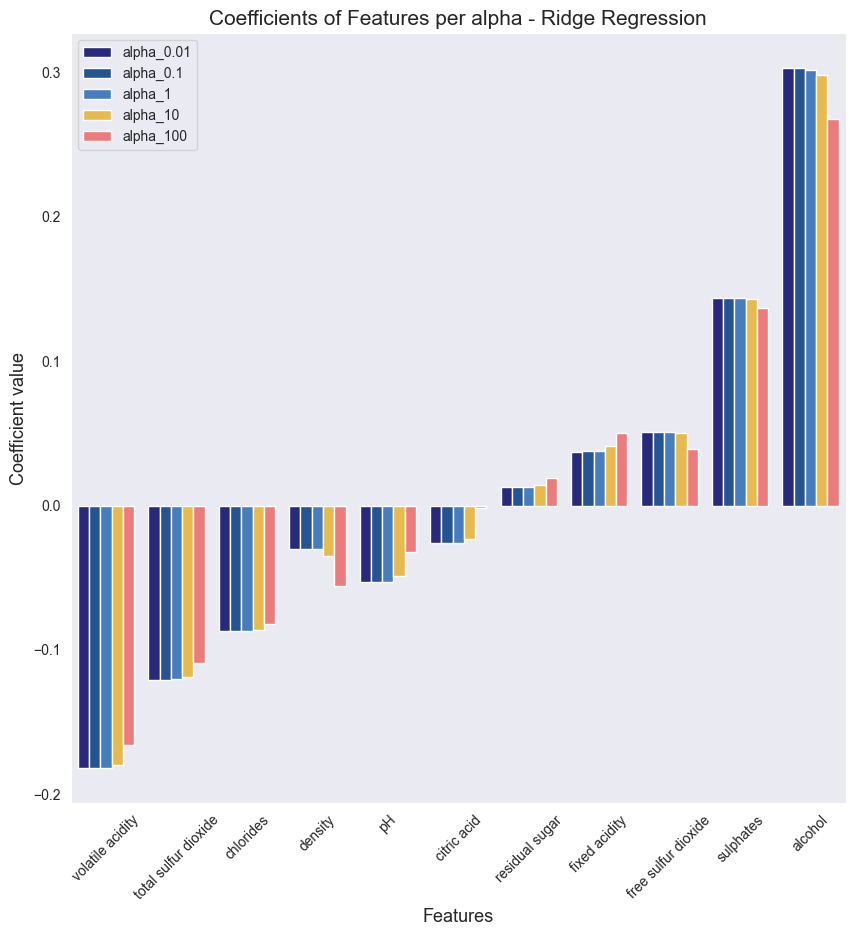

In [38]:
coefi_melt = coefi.melt(id_vars =['Feature'] ,
             value_vars=['alpha_0.01', 'alpha_0.1', 'alpha_1', 'alpha_10', 'alpha_100'])

plt.figure(figsize=(10,10))
plt.title('Coefficients of Features per alpha - Ridge Regression', fontsize = 15)
plt.grid()
sns.barplot(data = coefi_melt.sort_values(by = 'value'),
            x = 'Feature',
            y = 'value',
            hue = 'variable',
            palette=['#191D88', '#1450A3', '#337CCF', '#FFC436', '#FF6969'] 
            )
plt.xticks(rotation = 45)
plt.ylabel('Coefficient value', fontsize = 13)
plt.xlabel('Features', fontsize = 13)
plt.legend();

## Ridge Regression Pipeline Visualization

Here we create a Ridge regression pipeline with the best alpha value (0.01) and visualize its structure. This pipeline consists of:
1. StandardScaler: To standardize the features
2. Ridge regression: With alpha=0.01 for regularization


In [39]:
ri_ = Pipeline([
        ('stdr', StandardScaler()),
        ('ri',Ridge(alpha = 0.01))
    ])

ri_

Pipeline(steps=[('stdr', StandardScaler()), ('ri', Ridge(alpha=0.01))])

## Ridge Regression Training Performance Evaluation

Here we identify the best alpha value based on training set performance. We:
1. Find the alpha value that gives the lowest Mean Squared Error (MSE) on the training data
2. Report the minimum training MSE achieved

This helps us understand how well our model fits the training data.


In [40]:
print('The best alpha as per train MSE is: ' + str( alphas[mse_train.index(min(mse_train))] ) )
print('\nMinimum train MSE of Ridge Regression: ' + str(np.round(min(mse_train),4))  )

The best alpha as per train MSE is: 0.01

Minimum train MSE of Ridge Regression: 0.4274


## Ridge Regression Test Performance Evaluation

Now we evaluate our model's performance on the test set. We:
1. Find the alpha value that gives the lowest Mean Squared Error (MSE) on the test data
2. Report the minimum test MSE achieved

This helps us understand how well our model generalizes to unseen data. Comparing the best alpha values for training and test sets can also reveal potential overfitting.


In [41]:
print('The best alpha as per test MSE is: ' + str( alphas[mse_test.index(min(mse_test))] ) )
print('\nMinimum test MSE of Ridge Regression: ' + str(np.round(min(mse_test),4))  )

The best alpha as per test MSE is: 0.01

Minimum test MSE of Ridge Regression: 0.3883


### SequentialFeatureSelection using the Lasso to select 4 features.

## Sequential Feature Selection Implementation

In this section, we implement Sequential Feature Selection (SFS) with Lasso regression. SFS is a greedy algorithm that:
1. Starts with an empty set of features
2. Iteratively adds the feature that most improves the model performance
3. Stops when a specified number of features is reached (in this case, 4 features)

For each alpha value in our regularization strength list, we:
1. Create a pipeline with StandardScaler, SequentialFeatureSelector, and Lasso regression
2. Fit the model to the training data
3. Calculate and store the training and test MSE

This approach combines the benefits of sequential feature selection with Lasso regularization.


In [42]:
alphas = [0.01, 0.1, 1, 10, 100]

mse_train = []
mse_test = []

for alpha in alphas:
    lasso_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('selector', SequentialFeatureSelector(Lasso(), n_features_to_select = 4)),
    ('lasso', Lasso(alpha = alpha))
    ])

    lasso_pipe.fit(X_train, y_train)
    mse_train.append( mean_squared_error(lasso_pipe.predict(X_train), y_train) )
    mse_test.append( mean_squared_error(lasso_pipe.predict(X_test), y_test) )

## Sequential Feature Selection Performance Evaluation

Now we evaluate the performance of our Sequential Feature Selection with Lasso regression approach. We:
1. Find the best alpha value based on training MSE
2. Find the best alpha value based on test MSE
3. Report the minimum training and test MSE achieved

This helps us understand how well our feature selection approach performs and how it compares to the Ridge regression approach.


In [43]:
print('The best alpha as per train MSE is: ' + str( alphas[mse_train.index(min(mse_train))] ) )
print('\nThe best alpha as per test MSE is: ' + str( alphas[mse_test.index(min(mse_test))] ) )
print('\nMinimum train MSE of Lasso Regression (SFS): ' + str(np.round(min(mse_train),4))  )
print('\nMinimum test MSE of Lasso Regression (SFS): ' + str(np.round(min(mse_test),4))  )

The best alpha as per train MSE is: 0.01

The best alpha as per test MSE is: 0.01

Minimum train MSE of Lasso Regression (SFS): 0.569

Minimum test MSE of Lasso Regression (SFS): 0.5032


## Optimal Sequential Feature Selection Model

Based on our performance evaluation, we now create an optimal Sequential Feature Selection pipeline with the best hyperparameters:
1. We use Lasso with alpha=1 for feature selection (selecting 4 features)
2. We use Lasso with alpha=0.01 for the final model (based on our test MSE results)

After fitting the model, we examine which features were selected and their corresponding coefficients. This helps us understand which features are most important for predicting wine quality according to this feature selection approach.


In [44]:
lasso_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('selector',SequentialFeatureSelector(Lasso(alpha = 1), n_features_to_select = 4) ),
    ('lasso', Lasso(alpha = 0.01))
    ]).fit(X_train, y_train)

pd.DataFrame(
{'Features': lasso_pipe[:-1].get_feature_names_out(),
'Coefficients': lasso_pipe.named_steps['lasso'].coef_ }).set_index('Features') 

,Coefficients
Features,
fixed acidity,0.007662
volatile acidity,-0.293782
citric acid,0.000000
residual sugar,0.000000


## Sequential Feature Selection Pipeline Visualization

Here we visualize the structure of our optimal Sequential Feature Selection pipeline. This helps us understand the flow of data through the pipeline and the transformations applied at each step.


In [45]:
lasso_pipe

Pipeline(steps=[('scaler', StandardScaler()),
                ('selector',
                 SequentialFeatureSelector(estimator=Lasso(alpha=1),
                                           n_features_to_select=4)),
                ('lasso', Lasso(alpha=0.01))])

## Sequential Feature Selection Training Performance

Here we calculate the Mean Squared Error (MSE) of our optimal Sequential Feature Selection model on the training set. This helps us understand how well the model fits the data it was trained on.


In [46]:
mean_squared_error(lasso_pipe.predict(X_train), y_train) 

0.5690134341656238

## Sequential Feature Selection Test Performance

Now we calculate the Mean Squared Error (MSE) of our optimal Sequential Feature Selection model on the test set. This helps us understand how well the model generalizes to unseen data. Comparing the training and test MSE can reveal if the model is overfitting or underfitting.


In [47]:
mean_squared_error(lasso_pipe.predict(X_test), y_test)

0.5032440054210991

### RFE using Lasso to select 4 features.

## Recursive Feature Elimination (RFE) Implementation

In this section, we implement Recursive Feature Elimination (RFE) with Lasso regression. RFE is a feature selection method that:
1. Trains the model on all features
2. Ranks features based on their importance
3. Recursively removes the least important features
4. Stops when a specified number of features is reached (in this case, 4 features)

Unlike Sequential Feature Selection (which adds features), RFE starts with all features and removes them one by one.

We create a pipeline with:
1. StandardScaler: To standardize the features
2. RFE selector: Using Lasso as the base estimator to select 4 features
3. Lasso regression: With alpha=0.01 for the final model

This approach allows us to compare RFE with the Sequential Feature Selection method we implemented earlier.


In [48]:
alphas = [0.01, 0.1, 1, 10, 100]
#coefi_lasso = pd.DataFrame(X_train.columns.values, columns = ['Feature'])
mse_train = []
mse_test = []

selector = RFE(Lasso(), n_features_to_select = 4)

#########################

lasso_pipe2 = Pipeline([
    ('scaler', StandardScaler()),
    ('selector', selector),
    ('lasso', Lasso(alpha = 0.01))
])
lasso_pipe2.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('selector', RFE(estimator=Lasso(), n_features_to_select=4)),
                ('lasso', Lasso(alpha=0.01))])

## RFE Selected Features Analysis

Here we examine which features were selected by the Recursive Feature Elimination (RFE) method and their corresponding coefficients in the final Lasso model. This helps us:
1. Identify which features RFE considers most important for predicting wine quality
2. Compare these selected features with those chosen by Sequential Feature Selection
3. Understand the relative importance of each feature based on its coefficient magnitude


In [49]:
pd.DataFrame(
{'Features': lasso_pipe2[:-1].get_feature_names_out(),
'Coefficients': lasso_pipe2.named_steps.lasso.coef_ }).set_index('Features')

,Coefficients
Features,
density,-0.000000
pH,-0.070671
sulphates,0.127386
alcohol,0.387778


## RFE Training Performance

Here we calculate the Mean Squared Error (MSE) of our RFE model on the training set. This helps us understand how well the model fits the data it was trained on and allows us to compare its performance with the Sequential Feature Selection approach.


In [50]:
mean_squared_error(lasso_pipe2.predict(X_train), y_train) 

0.47666544026472407

## RFE Test Performance

Now we calculate the Mean Squared Error (MSE) of our RFE model on the test set. This helps us understand how well the model generalizes to unseen data. Comparing this with the training MSE and with the test MSE of other feature selection methods helps us evaluate which approach performs best.


In [51]:
mean_squared_error(lasso_pipe2.predict(X_test), y_test)

0.4450326760357568

### Creating a pipeline combining Ridge and Lasso

## Hybrid Approach: RFE with Ridge Regression

In this section, we implement a hybrid approach that combines:
1. RFE (Recursive Feature Elimination) using Lasso for feature selection
2. Ridge regression for the final model

This hybrid approach leverages:
- Lasso's ability to identify important features through RFE
- Ridge regression's ability to handle correlated features and provide stable coefficients

By combining these methods, we aim to get the best of both worlds: effective feature selection and robust prediction.


In [52]:
selector = RFE(Lasso(), n_features_to_select = 4)

#########################

RLP = Pipeline([
    ('scaler', StandardScaler()),
    ('selector', selector),
    ('ri', Ridge(alpha = 0.01))
])
RLP.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('selector', RFE(estimator=Lasso(), n_features_to_select=4)),
                ('ri', Ridge(alpha=0.01))])

## Hybrid Approach (RFE+Ridge) Feature Analysis

Here we examine which features were selected by the RFE method and their corresponding coefficients in the final Ridge model. This helps us:
1. Identify which features are considered most important by this hybrid approach
2. Compare these selected features with those chosen by other methods
3. Understand how Ridge regression assigns coefficients differently than Lasso


In [53]:
pd.DataFrame(
{'Features': RLP[:-1].get_feature_names_out(),
'Coefficients': RLP.named_steps.ri.coef_ }).set_index('Features')

,Coefficients
Features,
density,-0.004558
pH,-0.082631
sulphates,0.134511
alcohol,0.397346


## Hybrid Approach (RFE+Ridge) Training Performance

Here we calculate the Mean Squared Error (MSE) of our hybrid approach on the training set. This helps us understand how well the model fits the data it was trained on and allows us to compare its performance with the other feature selection approaches.


In [54]:
mean_squared_error(RLP.predict(X_train), y_train) 

0.4763592190093129

## Hybrid Approach (RFE+Ridge) Test Performance

Now we calculate the Mean Squared Error (MSE) of our hybrid approach on the test set. This helps us understand how well the model generalizes to unseen data. Comparing this with the training MSE and with the test MSE of other feature selection methods helps us evaluate which approach performs best overall.


In [55]:
mean_squared_error(RLP.predict(X_test), y_test)

0.4430693051322713

## Alternative Hybrid Approach: SFS with Ridge Regression

In this section, we implement another hybrid approach that combines:
1. Sequential Feature Selection (SFS) using Lasso for feature selection
2. Ridge regression for the final model

This approach differs from the previous hybrid in that it uses forward selection (adding features) rather than backward elimination (removing features). By comparing these two hybrid approaches, we can understand which feature selection method works better with Ridge regression.


In [56]:
selector = SequentialFeatureSelector(Lasso(), n_features_to_select = 4)

#########################

RSLP = Pipeline([
    ('scaler', StandardScaler()),
    ('selector', selector),
    ('ri', Ridge(alpha = 0.01))
])
RSLP.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('selector',
                 SequentialFeatureSelector(estimator=Lasso(),
                                           n_features_to_select=4)),
                ('ri', Ridge(alpha=0.01))])

## Alternative Hybrid Approach (SFS+Ridge) Feature Analysis

Here we examine which features were selected by the Sequential Feature Selection method and their corresponding coefficients in the final Ridge model. This helps us:
1. Identify which features are considered most important by this alternative hybrid approach
2. Compare these selected features with those chosen by RFE and other methods
3. Understand the differences in feature selection between SFS and RFE


In [57]:
pd.DataFrame(
{'Features': RSLP[:-1].get_feature_names_out(),
'Coefficients': RSLP.named_steps.ri.coef_ }).set_index('Features')

,Coefficients
Features,
fixed acidity,0.025592
volatile acidity,-0.309688
citric acid,-0.019022
residual sugar,0.007206


## Alternative Hybrid Approach (SFS+Ridge) Training Performance

Here we calculate the Mean Squared Error (MSE) of our alternative hybrid approach on the training set. This helps us understand how well the model fits the data it was trained on and allows us to compare its performance with the RFE+Ridge hybrid and other feature selection approaches.


In [58]:
mean_squared_error(RSLP.predict(X_train), y_train) 

0.5686824873036432

## Alternative Hybrid Approach (SFS+Ridge) Test Performance

Now we calculate the Mean Squared Error (MSE) of our alternative hybrid approach on the test set. This helps us understand how well the model generalizes to unseen data. Comparing this with the training MSE and with the test MSE of other feature selection methods helps us determine which approach performs best for predicting wine quality.


In [59]:
mean_squared_error(RSLP.predict(X_test), y_test)

0.5021493549782005